In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential

In [6]:
df = pd.read_csv(r"C:\Users\tript\Desktop\Project\Dataset-SA.csv")

In [7]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [8]:
df.shape

(205052, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [10]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [11]:
null_values = df.isnull().sum()

print("Null values in the entire DataFrame:")
print(null_values)

Null values in the entire DataFrame:
product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
null_values = df.isnull().sum()
null_values

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
import string

df['Review'] = df['Review'].apply(lambda x: x.lower())
df['Review'] = df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [16]:
df['Review']

0                   super
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205045           terrific
205046     classy product
205049               nice
205050           just wow
205051      valueformoney
Name: Review, Length: 154467, dtype: object

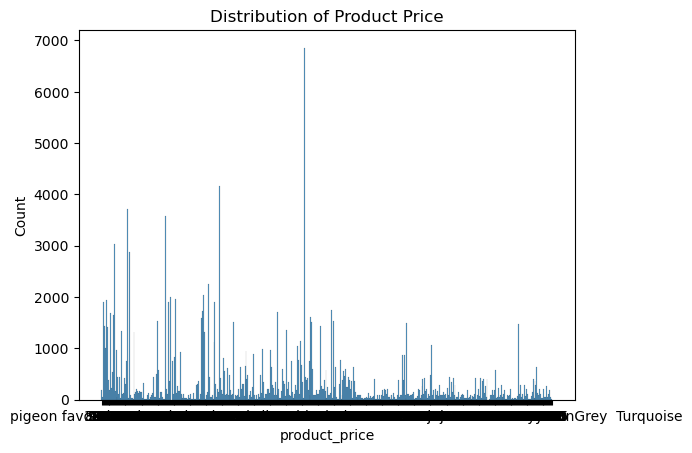

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of numerical variables
sns.histplot(df['product_price'])
plt.title('Distribution of Product Price')
plt.show()

In [18]:
# Count the number of reviews by sentiment
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

positive    122808
negative     23353
neutral       8306
Name: Sentiment, dtype: int64


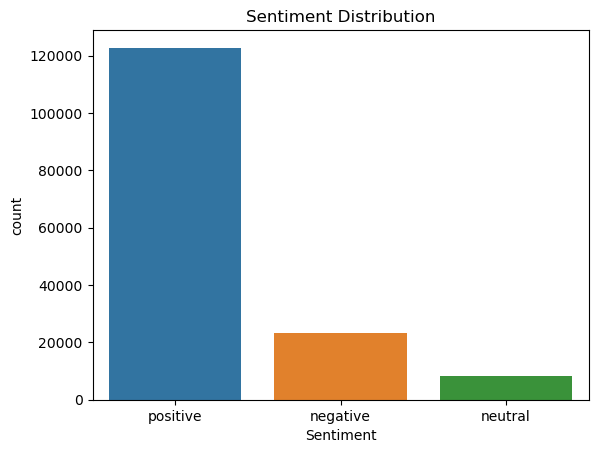

In [19]:
# Visualize the distribution of sentiment
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is your DataFrame containing text data
text_data = df['Review']
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()

In [21]:
feature_names

array(['10', '100', '1010', ..., 'yr', 'zero', 'zip'], dtype=object)

In [36]:
data_features = vectorizer.transform(df.Review)

In [37]:
data_features

<154467x1325 sparse matrix of type '<class 'numpy.int64'>'
	with 293410 stored elements in Compressed Sparse Row format>

In [38]:
data_features.shape

(154467, 1325)

In [40]:
data_features.getnnz()

293410

In [41]:
density = (data_features.getnnz() * 100) / (data_features.shape[0] * data_features.shape[1])
print("Density of the matrix: ", density)


Density of the matrix:  0.14335845807451578


In [42]:
feature_counts = df['Review'].value_counts()
feature_counts

wonderful                                         7623
not specified                                     5714
great product                                     4816
brilliant                                         4807
awesome                                           4797
                                                  ... 
no 1 worst product                                   1
50  50                                               1
really bad product worst service from flipkart       1
nice mixer  nice price                               1
product looking very nice  strong quality            1
Name: Review, Length: 1263, dtype: int64

In [43]:
features = vectorizer.get_feature_names_out() 
# Replace with the variable that holds feature names
features_counts = np.sum(data_features.toarray(), axis=0)
features_counts_df = pd.DataFrame({'features': features, 'counts': features_counts})

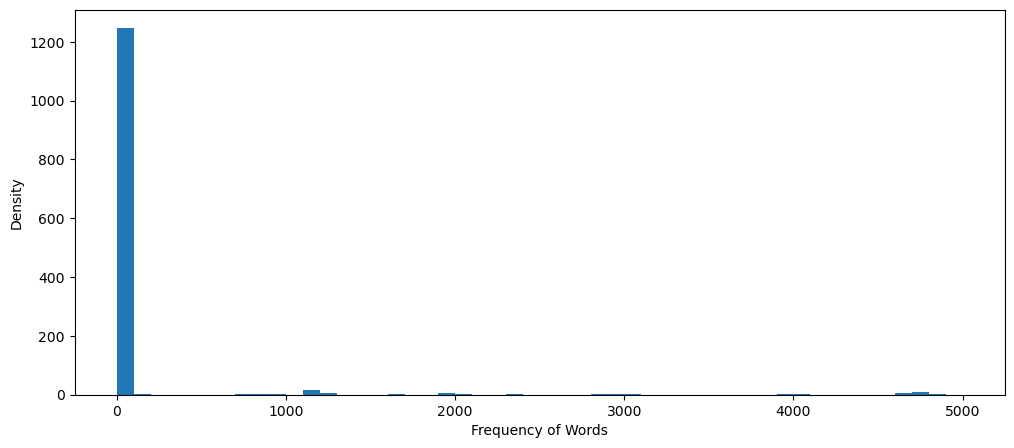

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(features_counts_df['counts'], bins=50, range=(0, 5000))
plt.xlabel('Frequency of Words')
plt.ylabel('Density')
plt.show()

In [45]:
count_of_single_occurrences = len(features_counts_df[features_counts_df['counts'] == 1])
count_of_single_occurrences

763

In [46]:
count_vectorizer = CountVectorizer(max_features=10000)
feature_vector = count_vectorizer.fit_transform(df['Review'])
features = count_vectorizer.get_feature_names_out()
data_features = feature_vector.toarray()
features_counts = np.sum(data_features, axis=0)
feature_counts = pd.DataFrame({'features': features, 'counts': features_counts})


In [47]:
top_features_counts = feature_counts.sort_values('counts', ascending=False).head(15)

In [48]:
top_features_counts

,features,counts
930,product,25782
521,good,14842
1172,the,9591
115,awesome,9558
943,purchase,9310
1166,terrific,9260
819,not,8867
810,nice,7915
1304,worth,7651
1293,wonderful,7638


In [49]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tript\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
df['Review'][0:10]

0                 super
1               awesome
2                  fair
3       useless product
4                  fair
5               awesome
6    highly recommended
7                  nice
8        unsatisfactory
9       worth the money
Name: Review, dtype: object

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model
model = SVC()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


Accuracy:  0.9011458535637988
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.00      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.58      0.59      0.59     30894
weighted avg       0.85      0.90      0.87     30894



Accuracy: 0.9011
Precision: The precision for the negative sentiment is 0.84, for the neutral sentiment is 0.0, and for the positive sentiment is 0.91.
Recall: The recall for the negative sentiment is 0.78, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.81, for the neutral sentiment is 0.0, and for the positive sentiment is 0.95.

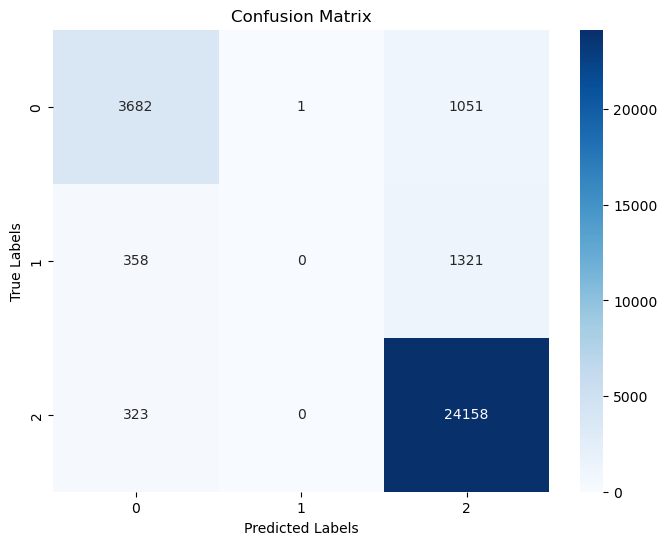

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [53]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


Accuracy:  0.9013076972874992
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.67      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.81      0.59      0.59     30894
weighted avg       0.89      0.90      0.87     30894



Accuracy: 0.9012
Precision: The precision for the negative sentiment is 0.84, for the neutral sentiment is 0.0, and for the positive sentiment is 0.91.
Recall: The recall for the negative sentiment is 0.78, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.81, for the neutral sentiment is 0.0, and for the positive sentiment is 0.95.

In [54]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


C:\Users\tript\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9012105910532789
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.67      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.81      0.59      0.59     30894
weighted avg       0.89      0.90      0.87     30894



Accuracy: 0.9012
Precision: The precision for the negative sentiment is 0.84, for the neutral sentiment is 0.67, and for the positive sentiment is 0.91.
Recall: The recall for the negative sentiment is 0.78, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.81, for the neutral sentiment is 0.0, and for the positive sentiment is 0.95.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Gradient Boosting)
model = GradientBoostingClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


C:\Users\tript\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tript\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.9011782223085388
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.00      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.58      0.59      0.59     30894
weighted avg       0.85      0.90      0.87     30894



C:\Users\tript\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9012
Precision: The precision for the negative sentiment is 0.84, for the neutral sentiment is 0.0, and for the positive sentiment is 0.91.
Recall: The recall for the negative sentiment is 0.78, for the neutral sentiment is 0.0, and for the positive sentiment is 0.99.
F1-Score: The F1-score for the negative sentiment is 0.81, for the neutral sentiment is 0.0, and for the positive sentiment is 0.95.

In [56]:
import re
from nltk.stem import PorterStemmer
import nltk

stemmer = PorterStemmer()

def get_stemmed_tokens(doc):
    nltk.download('punkt') # Download the required nltk package 'punkt' for word tokenization
    all_tokens = nltk.word_tokenize(doc)
    clean_tokens = []
    for each_token in all_tokens:
        if re.search('[a-zA-Z]', each_token):
            clean_tokens.append(each_token)
    stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
    return stemmed_tokens

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemmed_words(doc):
    return [stemmer.stem(w) for w in doc.split()]

tfidf_vectorizer = TfidfVectorizer(analyzer=stemmed_words, max_features=10000)
feature_vector = tfidf_vectorizer.fit_transform(df['Review'])
data_features = feature_vector.toarray()
features = tfidf_vectorizer.get_feature_names_out()

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)


Accuracy:  0.9011782223085388
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.00      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.58      0.59      0.59     30894
weighted avg       0.85      0.90      0.87     30894



These results indicate the performance of each model on sentiment classification. The accuracy values are consistent across all the classifiers. However, it is important to note that the models performed poorly in predicting the neutral sentiment, achieving an F1-score of 0.0 for this class. This suggests that the models might struggle to accurately classify neutral sentiments.

Further analysis and experimentation may be required to improve the performance of the models on the neutral sentiment class. Additionally, considering other evaluation metrics and exploring alternative approaches could provide deeper insights into the models' effectiveness for sentiment analysis

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
model1 = SentimentIntensityAnalyzer()
sentiment_scores = model1.polarity_scores(df)
print(sentiment_scores)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
